# Acoular - Erweiterung der Funktionalität mit CSV und Wave Dateien

## Laden der Pakete und Erstellen der Testdateien
Zunächst werden die nötigen Pakete für die Erstellung sowie die Verarbeitung importiert und ggf. installiert. Daraufhin werden die Demo-Dateien erstellt.

In [1]:
# packages to install:
# pip install acoular
# pip install numpy
# pip install scipy
# pip install matplotlib
# pip install pandas
# pip install tables
# pip install h5py
# pip install traits 
# pip install wavefile

try:
    from traits.api import ListInt
except ImportError:
    %pip install traits
    from traits.api import ListInt

try:
    import h5py
except ImportError:
    %pip install h5py
    import h5py

try:
    import tables
except ImportError:
    %pip install tables
    import tables

try:
    import matplotlib.pyplot as plt
except ImportError:
    %pip install matplotlib
    import matplotlib.pyplot as plt

try:
    from soundfile import SoundFile
except ImportError:
    %pip install soundfile
    from soundfile import SoundFile

try:
    from pandas import read_csv
except ImportError:
    %pip install pandas
    from pandas import read_csv


import time
import os

from scipy.io import wavfile
import numpy as np
'''Workspace of the Notebook project'''
ipynb_path = os.path.abspath("")


from pathlib import Path
from acoular import (
    BeamformerBase,
    L_p,
    MicGeom,
    Mixer,
    PointSource,
    PowerSpectra,
    RectGrid,
    SteeringVector,
    WNoiseGenerator,
    WriteH5,
    config,
    TimeSamples,
    WavSamples,
    CsvSamples,
    MaskedWavSamples,
    MaskedCsvSamples,
    MaskedTimeSamples,
)
from acoular import __file__ as bpath


c:\Users\duynh\AppData\Local\Programs\Python\Python310\lib\site-packages\acoular\h5files.py:5: UserWarning: We detected that Numpy is already loaded and uses OpenBLAS. Because this conflicts with Numba parallel execution, we disable parallel execution for now and processing might be slower. To speed up, either import Numpy after Acoular or set environment variable OPENBLAS_NUM_THREADS=1 before start of the program.
  from .configuration import config


Die H5 Datei wird erstellt und abgespeichert. Diese dient auch als Basis für die Erstellung weiterer Dateien in Csv und Wav Format.

In [2]:
# set up the parameters
sfreq = 51200
duration = 1
nsamples = duration * sfreq
micgeofile = Path(bpath).parent / 'xml' / 'array_64.xml'
h5savefile = 'three_sources.h5'

# generate test data, in real life this would come from an array measurement
mg = MicGeom(from_file=micgeofile)
n1 = WNoiseGenerator(sample_freq=sfreq, numsamples=nsamples, seed=1)
n2 = WNoiseGenerator(sample_freq=sfreq, numsamples=nsamples, seed=2, rms=0.7)
n3 = WNoiseGenerator(sample_freq=sfreq, numsamples=nsamples, seed=3, rms=0.5)
p1 = PointSource(signal=n1, mics=mg, loc=(-0.1, -0.1, 0.3))
p2 = PointSource(signal=n2, mics=mg, loc=(0.15, 0, 0.3))
p3 = PointSource(signal=n3, mics=mg, loc=(0, 0.1, 0.3))
pa = Mixer(source=p1, sources=[p2, p3])
wh5 = WriteH5(source=pa, name=str(ipynb_path) + "\\" + h5savefile)
wh5.save()


Die H5 Datei wird in .wav und .csv Format umgewandelt und bereitgestellt.

In [3]:
h5file = h5py.File(ipynb_path + "\\three_sources.h5", "r")

nparray = np.array(h5file['time_data'])
tables.file._open_files.close_all()

wavfile.write("three_sources.wav", sfreq, nparray.astype(float))

delimiter = ","
np.savetxt(ipynb_path+"\\three_sources.csv",nparray, delimiter=delimiter)

## Test der Klassen:
Folgend werden die Klassen(CsvSamples, MaskedCsvSamples, WavSamples, MaskedWavSamples) einmal auf Funktionalität getestet:

### TimeSamples

In [4]:
times=[time.time()]
ts_data = TimeSamples(name=str(ipynb_path)+'\\three_sources.h5')
times.append(time.time())
printed = 0
for i in ts_data.result(50000):
    print(i.shape)
    printed+=i.shape[0]
else:
    print("Number of returned values with result: ", printed)
times.append(time.time())

print("Time to load ",type(ts_data),": ",times[1]-times[0])
print("Time to return all values",times[2]-times[1])

(50000, 64)
(1200, 64)
Number of returned values with result:  51200
Time to load  <class 'acoular.sources.TimeSamples'> :  0.0030007362365722656
Time to return all values 0.009552001953125


In [5]:
times=[time.time()]
ts_data = MaskedTimeSamples(name=str(ipynb_path)+'\\three_sources.h5', start=1000, stop=2000, invalid_channels=[1,2,3,4,5,6,7,8,9,10,
                        11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32])
times.append(time.time())
printed = 0
for i in ts_data.result(128):
    print(i.shape)
    printed+=i.shape[0]
else:
    print("Number of returned values with result: ", printed)
times.append(time.time())

print("Time to load ",type(ts_data),": ",times[1]-times[0])
print("Time to return all values",times[2]-times[1])

(128, 32)
(128, 32)
(128, 32)
(128, 32)
(128, 32)
(128, 32)
(128, 32)
(104, 32)
Number of returned values with result:  1000
Time to load  <class 'acoular.sources.MaskedTimeSamples'> :  0.0029985904693603516
Time to return all values 0.0005047321319580078


### CsvSamples

In [6]:
times=[time.time()]
ts_data = CsvSamples(name=str(ipynb_path)+'\\three_sources.csv',sample_freq = 51200)
times.append(time.time())
printed = 0
for i in ts_data.result(50000):
    print(i.shape)
    printed+=i.shape[0]
else:
    print("Number of returned values with result: ", printed)
times.append(time.time())

print("Time to load ",type(ts_data),": ",times[1]-times[0])
print("Time to return all values",times[2]-times[1])

(50000, 64)
(1200, 64)
Number of returned values with result:  51200
Time to load  <class 'acoular.sources.CsvSamples'> :  0.3115360736846924
Time to return all values 0.7143385410308838


In [7]:
times=[time.time()]
ts_data = MaskedCsvSamples(name=str(ipynb_path)+'\\three_sources.csv',sample_freq = 51200, start=1000, stop=2000, invalid_channels=[1,2,3,4,5,6,7,8,9,10,
                        11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32])
times.append(time.time())
printed = 0
for i in ts_data.result(128):
    print(i.shape)
    printed+=i.shape[0]
else:
    print("Number of returned values with result: ", printed)
times.append(time.time())

print("Time to load ",type(ts_data),": ",times[1]-times[0])
print("Time to return all values",times[2]-times[1])

(128, 32)
(128, 32)
(128, 32)
(128, 32)
(128, 32)
(128, 32)
(128, 32)
(104, 32)
Number of returned values with result:  1000
Time to load  <class 'acoular.sources.MaskedCsvSamples'> :  0.2901449203491211
Time to return all values 0.052805423736572266


### WavSamples

In [8]:
times=[time.time()]
ts_data = WavSamples(name=str(ipynb_path)+'\\three_sources.wav')
times.append(time.time())
printed = 0
for i in ts_data.result(25000):
    print(i.shape)
    printed+=i.shape[0]
else:
    print("Number of returned values with result: ", printed)
times.append(time.time())

print("Time to load ",type(ts_data),": ",times[1]-times[0])
print("Time to return all values",times[2]-times[1])

(25000, 64)
(25000, 64)
(1200, 64)
Number of returned values with result:  51200
Time to load  <class 'acoular.sources.WavSamples'> :  0.005647897720336914
Time to return all values 0.009331941604614258


In [9]:
times=[time.time()]
ts_data = MaskedWavSamples(name=str(ipynb_path)+'\\three_sources.wav', start=1000, stop=2000, invalid_channels=[1,2,3,4,5,6,7,8,9,10,
                        11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32])
times.append(time.time())
printed = 0
for i in ts_data.result(128):
    print(i.shape)
    printed+=i.shape[0]
else:
    print("Number of returned values with result: ", printed)
times.append(time.time())

print("Time to load ",type(ts_data),": ",times[1]-times[0])
print("Time to return all values",times[2]-times[1])

(128, 32)
(128, 32)
(128, 32)
(128, 32)
(128, 32)
(128, 32)
(128, 32)
(104, 32)
Number of returned values with result:  1000
Time to load  <class 'acoular.sources.MaskedWavSamples'> :  0.002017498016357422
Time to return all values 0.0019974708557128906


## Demonstration der Demo-Dateien in Acoular

Processing data, this may take some time ...
Processing data, this may take some time ...
Processing data, this may take some time ...


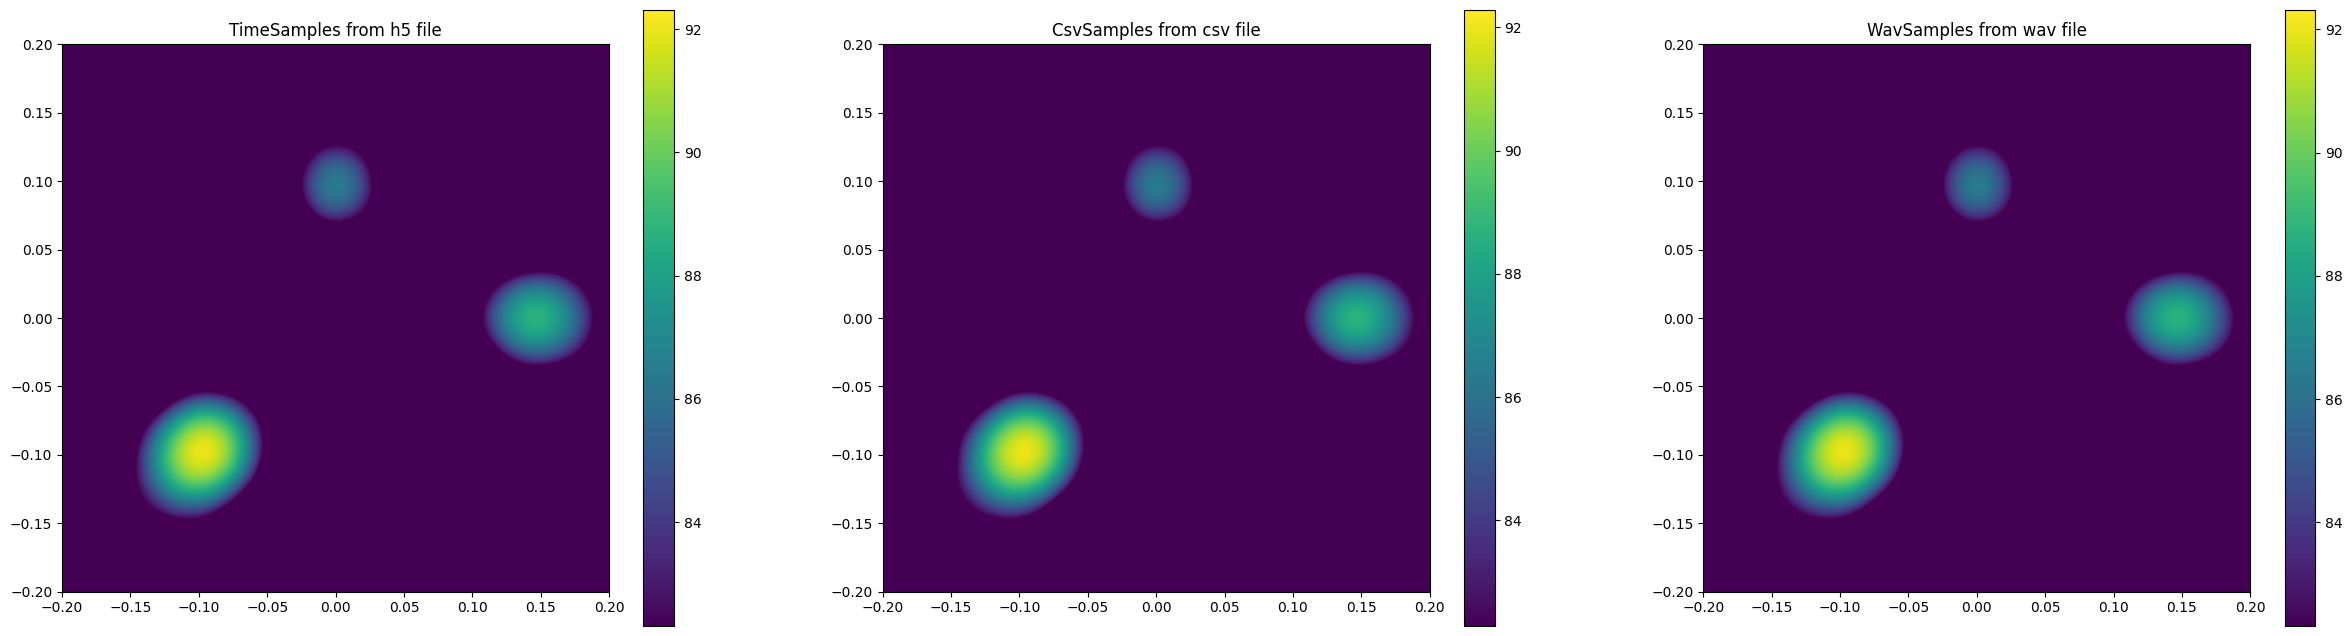

In [10]:
plt.figure(figsize=(30,8))

mg = MicGeom(from_file=micgeofile)
print('Processing data, this may take some time ...')

ts_h5data = TimeSamples(name=ipynb_path+'\\three_sources.h5',sample_freq=51200)
config.global_caching="none"
ps = PowerSpectra(time_data=ts_h5data, block_size=128, window='Hanning')

rg = RectGrid(x_min=-0.2, x_max=0.2, y_min=-0.2, y_max=0.2, z=0.3, increment=0.01)
st = SteeringVector(grid=rg, mics=mg)

bb = BeamformerBase(freq_data=ps, steer=st)
pm = bb.synthetic(8000, 3)
Lm = L_p(pm)

# plot result
if config.have_matplotlib:
    # show map
    plt.subplot(1, 3, 1)
    plt.imshow(Lm.T, origin='lower', vmin=Lm.max() - 10, extent=rg.extend(), interpolation='bicubic')
    plt.colorbar()
    plt.title("TimeSamples from h5 file")


mg = MicGeom(from_file=micgeofile)
print('Processing data, this may take some time ...')

ts_csvdata = CsvSamples(name=ipynb_path+'\\three_sources.csv',sample_freq=51200)
config.global_caching="none"
ps = PowerSpectra(time_data=ts_csvdata, block_size=128, window='Hanning')

rg = RectGrid(x_min=-0.2, x_max=0.2, y_min=-0.2, y_max=0.2, z=0.3, increment=0.01)
st = SteeringVector(grid=rg, mics=mg)

bb = BeamformerBase(freq_data=ps, steer=st)
pm = bb.synthetic(8000, 3)
Lm = L_p(pm)

# plot result
if config.have_matplotlib:
    # show map
    plt.subplot(1, 3, 2)
    plt.imshow(Lm.T, origin='lower', vmin=Lm.max() - 10, extent=rg.extend(), interpolation='bicubic')
    plt.colorbar()
    plt.title("CsvSamples from csv file")

mg = MicGeom(from_file=micgeofile)
print('Processing data, this may take some time ...')

ts_wavdata = WavSamples(name=ipynb_path+'\\three_sources.wav')
config.global_caching="none"
ps = PowerSpectra(time_data=ts_wavdata, block_size=128, window='Hanning')

rg = RectGrid(x_min=-0.2, x_max=0.2, y_min=-0.2, y_max=0.2, z=0.3, increment=0.01)
st = SteeringVector(grid=rg, mics=mg)

bb = BeamformerBase(freq_data=ps, steer=st)
pm = bb.synthetic(8000, 3)
Lm = L_p(pm)

# plot result
if config.have_matplotlib:
    # show map
    plt.subplot(1, 3, 3)
    plt.imshow(Lm.T, origin='lower', vmin=Lm.max() - 10, extent=rg.extend(), interpolation='bicubic')
    plt.colorbar()
    plt.title("WavSamples from wav file")

plt.show()

## Testen großer Dateien

Erstellen einer 1 GB .csv Datei

In [11]:
create = False
if create == True:
    import random
    import uuid
    outfile = ipynb_path+ r"\largetester3.csv"
    outsize = 1024 * 1024 * 1024 # 1GB
    with open(outfile, 'w') as csvfile:
        size = 0
        while size < outsize:
            txt = '%.6f,%.6f,%.6f,%i\n' % (random.random()*50, random.random()*50, random.random()*50, random.randrange(1000))
            size += len(txt)
            csvfile.write(txt)

In [12]:
load_csv = True
if load_csv == True:
    times=[time.time()]
    ts_data = CsvSamples(name=str(ipynb_path)+'\\GitHub\\largetester3.csv',sample_freq = 51200)
    times.append(time.time())
    printed = 0
    for i in ts_data.result(50000):
        print(i.shape)
        printed+=i.shape[0]
    else:
        print("Number of returned values with result: ", printed)
    times.append(time.time())

    print("Time to load ",type(ts_data),": ",times[1]-times[0])
    print("Time to return all values",times[2]-times[1])

(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)
(50000, 4)

Laden von großen .wav Dateien

In [13]:
load_wave = True
if load_wave == True:       

    times=[time.time()]
    ts_data = WavSamples(name=str(ipynb_path)+"\\largetester3.wav")
    times.append(time.time())
    printed = 0
    for i in ts_data.result(50000):
        print(i.shape)
        printed+=i.shape[0]
    else:
        print("Number of returned values with result: ", printed)
    times.append(time.time())

    print("Time to load ",type(ts_data),": ",times[1]-times[0])
    print("Time to return all values",times[2]-times[1])

(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)
(50000, 2)